In [1]:
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import seaborn as sns

In [2]:
train_dir='C:\\Users\\Djole\\Desktop\\ml\\projekat_ml\\slike\\train'
test_dir='C:\\Users\\Djole\\Desktop\\ml\\projekat_ml\\slike\\test'
klase=['angry','disgust','fear','happy','neutral','sad','surprise']

br_klasa=len(klase)

In [ ]:
train_batch= train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(96, 96),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True,
    subset="training",
    seed=11
)

validation_batch= train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(96, 96),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation",
    seed=11
)

test_batch= test_generator.flow_from_directory(
    directory=test_dir,
    target_size=(96, 96),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,3,padding='same',activation='relu',input_shape=(96,96,1)))
model.add(keras.layers.Conv2D(64,3,padding='same',activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(.2))

model.add(keras.layers.Conv2D(128,3,padding='same',activation='relu',kernel_regularizer=keras.regularizers.l2(0.02)))
model.add(keras.layers.Conv2D(256,3,padding='same',activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(.2))

model.add(keras.layers.Conv2D(512,3,padding='same',activation='relu',kernel_regularizer=keras.regularizers.l2(0.02)))
model.add(keras.layers.Conv2D(256,3,padding='same',activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Conv2D(128,3,padding='same',activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(.2))

model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(.2))

model.add(keras.layers.Dense(br_klasa,activation='softmax'))

print(model.summary())

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_batch,epochs=70,validation_data=validation_batch,verbose=1)

In [ ]:
#cuvanje modela u keras formatu(novi format koji koristim umesto h5)
model.save('C:/Users/Djole/Desktop/Model_2.keras')

In [ ]:
plt.figure(figsize=(14, 5))

#Acc
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acc')
plt.plot(history.history['val_accuracy'], label='Acc validacioni skup')
plt.xlabel('Broj epoha')
plt.ylabel('Tacnost')
plt.title('Tacnost modela')
plt.legend()

#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Loss validacioni skup')
plt.xlabel('Broj epoha')
plt.ylabel('Loss')
plt.title('Loss modela')
plt.legend()

plt.tight_layout()
plt.show()

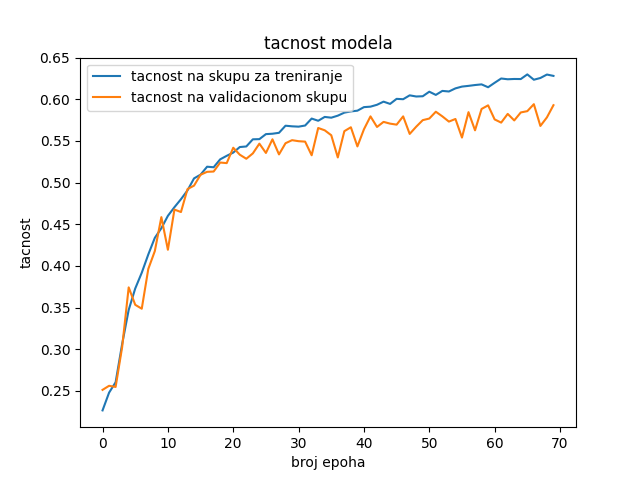

In [ ]:
def test():
    test_loss, test_acc = model.evaluate(test_batch, verbose=0)

    #predikcija
    y_pred_prob = model.predict(test_batch)
    y_pred = np.argmax(y_pred_prob, axis=1)

    y_true = test_batch.classes

    # rezultati testa MICRO
    accuracy_micro = metrics.accuracy_score(y_true, y_pred)
    precision_micro = metrics.precision_score(y_true, y_pred, average='micro')
    recall_micro = metrics.recall_score(y_true, y_pred, average='micro')
    f1_micro = metrics.f1_score(y_true, y_pred, average='micro')

    print('\n================MICRO====================\n')
    print(f'Accuracy MICRO: {accuracy_micro:.4f}')
    print(f'Precision MICRO: {precision_micro:.4f}')
    print(f'Recall MICRO: {recall_micro:.4f}')
    print(f'F1 Score MICRO: {f1_micro:.4f}')

    # rezultati testa weighted
    accuracy_weighted = metrics.accuracy_score(y_true, y_pred)
    precision_weighted = metrics.precision_score(y_true, y_pred, average='weighted')
    recall_weighted = metrics.recall_score(y_true, y_pred, average='weighted')
    f1_weighted = metrics.f1_score(y_true, y_pred, average='weighted')

    print('\n================weighted====================\n')
    print(f'Accuracy weighted: {accuracy_micro:.4f}')
    print(f'Precision weighted: {precision_micro:.4f}')
    print(f'Recall weighted: {recall_micro:.4f}')
    print(f'F1 Score weighted: {f1_micro:.4f}')

    accuracy_None = metrics.accuracy_score(y_true, y_pred)
    precision_None = metrics.precision_score(y_true, y_pred, average=None)
    recall_per_None = metrics.recall_score(y_true, y_pred, average=None)
    f1_per_None = metrics.f1_score(y_true, y_pred, average=None)

    print('\n================None====================\n')
    print(f'Accuracy None: {accuracy_micro:.4f}')
    print(f'Precision None: {precision_micro:.4f}')
    print(f'Recall None: {recall_micro:.4f}')
    print(f'F1 Score None: {f1_micro:.4f}')
    # matrica konfuzije
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=klase, yticklabels=klase)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
test()

Accuracy 0.1747

Precision 0.1747

Recall 0.1747 

F1 Score 0.1747

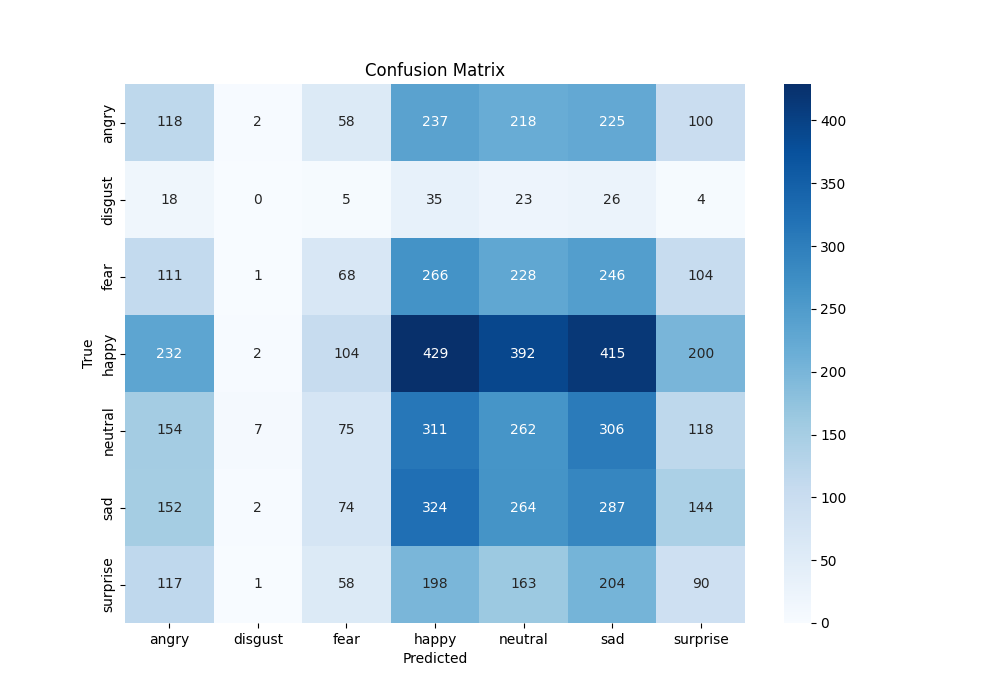